# pki_models.ipynb

The purpose of this file is to create a logistic regression and support vector machine model based on the normalized PKI dataset found in MLP2.

## Authors
1. Riley Cullen
2. Mason Adsero

## Data

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

pki_df = pd.read_csv("../MLP2/input/heart_2020_normalized.csv")
X = np.c_[pki_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', \
    'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', \
    'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', \
    'SkinCancer', 'American Indian/Alaskan Native', 'Asian', 'Black', \
    'Hispanic', 'Other', 'White', 'No diabetes', 'Borderline diabetes', \
    'Has diabetes', 'Has diabetes (during pregnancy)', 'No diabetes']]]
y = np.c_[pki_df['HeartDisease']]

target_names = ['No Heart Disease', 'Has Heart Disease']

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X shape:  (319795, 26)
y shape:  (319795, 1)
X_train shape:  (223856, 26)
X_test shape:  (95939, 26)
y_train shape:  (223856, 1)
y_test shape:  (95939, 1)


## Logistic Regression Model

### Train model using 10-fold cross validation

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

kf = KFold(n_splits=10, random_state=None, shuffle=True)

logreg = LogisticRegression()

for train_id, test_id in kf.split(X_train):
    
    X_train_kf, X_test_kf = X_train[train_id], X_train[test_id]
    y_train_kf, y_test_kf = y_train[train_id], y_train[test_id]

    logreg.fit(X_train_kf, y_train_kf.ravel())

    y_pred = logreg.predict(X_test_kf)
    
    confusion_mat = confusion_matrix(y_test_kf, y_pred)

    print(classification_report(y_test_kf, y_pred, target_names=target_names))


/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20470
Has Heart Disease       0.56      0.11      0.19      1916

         accuracy                           0.92     22386
        macro avg       0.74      0.55      0.57     22386
     weighted avg       0.89      0.92      0.89     22386

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20470
Has Heart Disease       0.56      0.11      0.19      1916

         accuracy                           0.92     22386
        macro avg       0.74      0.55      0.57     22386
     weighted avg       0.89      0.92      0.89     22386

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20470
Has Heart Disease       0.56      0.11      0.19      1916

         accuracy                           0.92     22386
        macro avg       0.74      0.55      0.57

/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20465
Has Heart Disease       0.55      0.11      0.18      1921

         accuracy                           0.92     22386
        macro avg       0.73      0.55      0.57     22386
     weighted avg       0.89      0.92      0.89     22386

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20465
Has Heart Disease       0.54      0.10      0.18      1921

         accuracy                           0.92     22386
        macro avg       0.73      0.55      0.57     22386
     weighted avg       0.89      0.92      0.89     22386

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20465
Has Heart Disease       0.54      0.10      0.18      1921

         accuracy                           0.92     22386
        macro avg       0.73      0.55      0.57

/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.95     20490
Has Heart Disease       0.47      0.09      0.16      1896

         accuracy                           0.91     22386
        macro avg       0.70      0.54      0.56     22386
     weighted avg       0.88      0.91      0.89     22386

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.95     20490
Has Heart Disease       0.47      0.09      0.16      1896

         accuracy                           0.91     22386
        macro avg       0.70      0.54      0.56     22386
     weighted avg       0.88      0.91      0.89     22386

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.95     20490
Has Heart Disease       0.47      0.09      0.16      1896

         accuracy                           0.91     22386
        macro avg       0.70      0.54      0.56

/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.95     20367
Has Heart Disease       0.57      0.11      0.19      2019

         accuracy                           0.91     22386
        macro avg       0.74      0.55      0.57     22386
     weighted avg       0.89      0.91      0.88     22386

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.95     20367
Has Heart Disease       0.57      0.11      0.19      2019

         accuracy                           0.91     22386
        macro avg       0.74      0.55      0.57     22386
     weighted avg       0.89      0.91      0.88     22386

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.95     20367
Has Heart Disease       0.57      0.11      0.19      2019

         accuracy                           0.91     22386
        macro avg       0.74      0.55      0.57

/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20509
Has Heart Disease       0.55      0.11      0.19      1877

         accuracy                           0.92     22386
        macro avg       0.74      0.55      0.57     22386
     weighted avg       0.89      0.92      0.89     22386

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20509
Has Heart Disease       0.55      0.11      0.19      1877

         accuracy                           0.92     22386
        macro avg       0.74      0.55      0.57     22386
     weighted avg       0.89      0.92      0.89     22386

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20509
Has Heart Disease       0.55      0.11      0.19      1877

         accuracy                           0.92     22386
        macro avg       0.74      0.55      0.57

/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.95     20436
Has Heart Disease       0.55      0.12      0.19      1950

         accuracy                           0.91     22386
        macro avg       0.73      0.55      0.57     22386
     weighted avg       0.89      0.91      0.89     22386

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.95     20436
Has Heart Disease       0.55      0.12      0.19      1950

         accuracy                           0.91     22386
        macro avg       0.73      0.55      0.57     22386
     weighted avg       0.89      0.91      0.89     22386

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.95     20436
Has Heart Disease       0.55      0.12      0.19      1950

         accuracy                           0.91     22386
        macro avg       0.73      0.55      0.57

/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   precision    recall  f1-score   support

 No Heart Disease       0.93      0.99      0.96     20566
Has Heart Disease       0.52      0.12      0.19      1819

         accuracy                           0.92     22385
        macro avg       0.72      0.55      0.57     22385
     weighted avg       0.89      0.92      0.90     22385

                   precision    recall  f1-score   support

 No Heart Disease       0.93      0.99      0.96     20566
Has Heart Disease       0.52      0.12      0.19      1819

         accuracy                           0.92     22385
        macro avg       0.72      0.55      0.57     22385
     weighted avg       0.89      0.92      0.90     22385

                   precision    recall  f1-score   support

 No Heart Disease       0.93      0.99      0.96     20566
Has Heart Disease       0.52      0.12      0.19      1819

         accuracy                           0.92     22385
        macro avg       0.72      0.55      0.57

/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.95     20429
Has Heart Disease       0.54      0.11      0.18      1956

         accuracy                           0.91     22385
        macro avg       0.73      0.55      0.57     22385
     weighted avg       0.89      0.91      0.89     22385

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.95     20429
Has Heart Disease       0.54      0.11      0.18      1956

         accuracy                           0.91     22385
        macro avg       0.73      0.55      0.57     22385
     weighted avg       0.89      0.91      0.89     22385

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.95     20429
Has Heart Disease       0.54      0.11      0.18      1956

         accuracy                           0.91     22385
        macro avg       0.73      0.55      0.57

/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20487
Has Heart Disease       0.55      0.11      0.18      1898

         accuracy                           0.92     22385
        macro avg       0.74      0.55      0.57     22385
     weighted avg       0.89      0.92      0.89     22385

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20487
Has Heart Disease       0.55      0.11      0.19      1898

         accuracy                           0.92     22385
        macro avg       0.74      0.55      0.57     22385
     weighted avg       0.89      0.92      0.89     22385

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20487
Has Heart Disease       0.55      0.11      0.19      1898

         accuracy                           0.92     22385
        macro avg       0.74      0.55      0.57

/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20473
Has Heart Disease       0.55      0.11      0.19      1912

         accuracy                           0.92     22385
        macro avg       0.73      0.55      0.57     22385
     weighted avg       0.89      0.92      0.89     22385

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20473
Has Heart Disease       0.55      0.11      0.19      1912

         accuracy                           0.92     22385
        macro avg       0.73      0.55      0.57     22385
     weighted avg       0.89      0.92      0.89     22385

                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     20473
Has Heart Disease       0.55      0.11      0.19      1912

         accuracy                           0.92     22385
        macro avg       0.73      0.55      0.57

### Evaluation on test data

In [51]:
y_pred = logreg.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred, labels=[1, 0])
print(confusion_mat, "\n\n")

print(classification_report(y_test, y_pred, target_names=target_names))

[[  866  7343]
 [  767 86963]] 


                   precision    recall  f1-score   support

 No Heart Disease       0.92      0.99      0.96     87730
Has Heart Disease       0.53      0.11      0.18      8209

         accuracy                           0.92     95939
        macro avg       0.73      0.55      0.57     95939
     weighted avg       0.89      0.92      0.89     95939



Accuracy =  0.8399651976531224


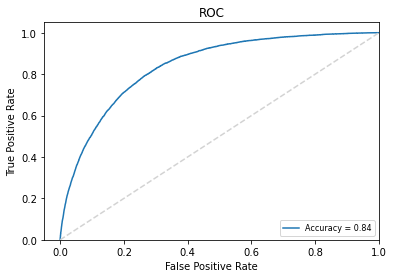

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_score = logreg.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)

print('Accuracy = ', roc_auc)

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Support Vector Machine

### Train and Validate Model

In [42]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

for train_id, test_id in kf.split(X_train):
    
    X_train_kf, X_test_kf = X_train[train_id], X_train[test_id]
    y_train_kf, y_test_kf = y_train[train_id], y_train[test_id]

    svm.fit(X_train_kf, y_train_kf)

    y_pred = svm.predict(X_test_kf)
    
    confusion_mat = confusion_matrix(y_test_kf, y_pred)

    print(classification_report(y_test_kf, y_pred, target_names=target_names))

/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                   precision    recall  f1-score   support

 No Heart Disease       0.92      1.00      0.95     20424
Has Heart Disease       0.67      0.04      0.07      1962

         accuracy                           0.91     22386
        macro avg       0.79      0.52      0.51     22386
     weighted avg       0.89      0.91      0.88     22386



/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                   precision    recall  f1-score   support

 No Heart Disease       0.92      1.00      0.96     20457
Has Heart Disease       0.65      0.04      0.08      1929

         accuracy                           0.92     22386
        macro avg       0.79      0.52      0.52     22386
     weighted avg       0.89      0.92      0.88     22386



/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                   precision    recall  f1-score   support

 No Heart Disease       0.92      1.00      0.96     20491
Has Heart Disease       0.68      0.04      0.08      1895

         accuracy                           0.92     22386
        macro avg       0.80      0.52      0.52     22386
     weighted avg       0.90      0.92      0.88     22386



/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                   precision    recall  f1-score   support

 No Heart Disease       0.92      1.00      0.96     20446
Has Heart Disease       0.62      0.04      0.07      1940

         accuracy                           0.91     22386
        macro avg       0.77      0.52      0.51     22386
     weighted avg       0.89      0.91      0.88     22386



/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                   precision    recall  f1-score   support

 No Heart Disease       0.92      1.00      0.96     20481
Has Heart Disease       0.62      0.04      0.07      1905

         accuracy                           0.92     22386
        macro avg       0.77      0.52      0.51     22386
     weighted avg       0.89      0.92      0.88     22386



/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                   precision    recall  f1-score   support

 No Heart Disease       0.92      1.00      0.96     20526
Has Heart Disease       0.55      0.03      0.07      1860

         accuracy                           0.92     22386
        macro avg       0.73      0.52      0.51     22386
     weighted avg       0.89      0.92      0.88     22386



/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                   precision    recall  f1-score   support

 No Heart Disease       0.92      1.00      0.95     20418
Has Heart Disease       0.67      0.04      0.08      1967

         accuracy                           0.91     22385
        macro avg       0.79      0.52      0.52     22385
     weighted avg       0.89      0.91      0.88     22385



/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                   precision    recall  f1-score   support

 No Heart Disease       0.92      1.00      0.96     20494
Has Heart Disease       0.65      0.04      0.07      1891

         accuracy                           0.92     22385
        macro avg       0.78      0.52      0.52     22385
     weighted avg       0.90      0.92      0.88     22385



/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                   precision    recall  f1-score   support

 No Heart Disease       0.92      1.00      0.96     20490
Has Heart Disease       0.56      0.04      0.07      1895

         accuracy                           0.92     22385
        macro avg       0.74      0.52      0.51     22385
     weighted avg       0.89      0.92      0.88     22385



/Users/rileycullen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                   precision    recall  f1-score   support

 No Heart Disease       0.92      1.00      0.96     20465
Has Heart Disease       0.54      0.03      0.06      1920

         accuracy                           0.91     22385
        macro avg       0.73      0.51      0.51     22385
     weighted avg       0.88      0.91      0.88     22385



### Test model

In [47]:
y_pred = svm.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred, labels=[1, 0])
print(confusion_mat, "\n\n")

print(classification_report(y_test, y_pred, target_names=target_names))

[[  305  7904]
 [  198 87532]] 


                   precision    recall  f1-score   support

 No Heart Disease       0.92      1.00      0.96     87730
Has Heart Disease       0.61      0.04      0.07      8209

         accuracy                           0.92     95939
        macro avg       0.76      0.52      0.51     95939
     weighted avg       0.89      0.92      0.88     95939



Accuracy =  0.8392681870616634


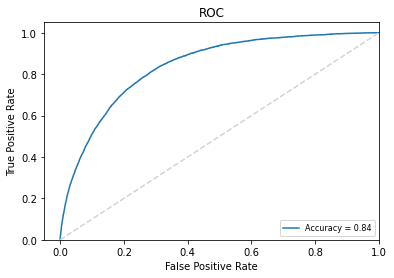

In [49]:
y_score = svm.decision_function(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(false_positive_rate, true_positive_rate)

print('Accuracy = ', roc_auc)

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()